In [56]:
from datetime import timedelta, datetime
import pandas as pd
import quantstats as qs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from multiverse import ClusterBetaMV

import warnings

warnings.filterwarnings("ignore")

In [66]:
sector_etfs = {
    'XLE US Equity': 'Energy',
    'XLU US Equity': 'Utilities', 
    'XLK US Equity': 'Information Technology',
    'XLB US Equity': 'Materials',
    'XLP US Equity': 'Consumer Staples', 
    'XLY US Equity': 'Consumer Discretionary',
    'XLI US Equity': 'Industrials',
    'XLV US Equity': 'Health Care',
    'XLF US Equity': 'Financials',
    'VOX US Equity': 'Communication Services', # 'XLC US Equity': 'Communication Services',
    #'XLRE US Equity': 'Real Estate'
}

benchmark = 'SPX Index' # S&P500

In [67]:
asset_returns = pd.read_excel('BLOOMBERG_ASSET_TR_RETURNS.xlsx', index_col=0)
asset_returns

,XLE US Equity,XLU US Equity,XLK US Equity,XLB US Equity,XLP US Equity,XLY US Equity,XLI US Equity,XLV US Equity,XLF US Equity,VOX US Equity,XLRE US Equity,SPX Index
1970-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010211
1970-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004946
1970-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006848
1970-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002047
1970-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000540
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-10,0.009072,-0.012139,0.015245,-0.006230,-0.006911,-0.002972,-0.006544,0.003560,-0.008847,0.002824,-0.022227,0.002461
2022-05-11,0.013420,0.007203,-0.031562,0.000492,-0.004333,-0.035837,-0.009071,-0.006621,-0.009223,-0.018001,-0.001436,-0.016426
2022-05-12,0.004243,-0.010097,-0.010312,-0.001843,-0.000264,0.006870,0.001853,0.009680,-0.007508,0.012186,0.007429,-0.000950
2022-05-13,0.034183,0.011900,0.033234,0.015387,0.015038,0.039372,0.012727,0.010609,0.014523,0.027115,0.024976,0.023983


In [68]:
etf_returns = asset_returns[list(sector_etfs.keys())]

In [72]:
first_date = datetime(2006, 12, 31)
sector_returns = etf_returns.loc[first_date:, etf_returns.columns != benchmark].dropna(how='all').fillna(0)
bm_returns = asset_returns.loc[first_date:, benchmark].dropna(how='all').fillna(0)

In [73]:
sector_returns.head()

,XLE US Equity,XLU US Equity,XLK US Equity,XLB US Equity,XLP US Equity,XLY US Equity,XLI US Equity,XLV US Equity,XLF US Equity,VOX US Equity
2007-01-03,-0.034965,0.002723,0.003009,-0.005745,0.006394,0.004171,0.006284,0.000299,0.004899,0.000544
2007-01-04,-0.018204,-0.001358,0.015431,-0.004623,0.001636,-0.000260,-0.004258,0.011343,-0.003250,-0.003168
2007-01-05,0.006661,-0.017949,-0.008020,-0.006676,-0.007216,-0.006751,-0.003421,-0.005608,-0.008424,-0.014280
2007-01-08,0.000000,-0.000554,0.002979,0.000000,0.001530,0.001569,0.003719,0.001187,0.004933,0.005395
2007-01-09,-0.008584,0.000831,0.001273,0.000292,0.002292,0.005482,-0.000570,-0.001186,-0.001636,-0.005641


In [77]:
month1 = sector_returns['2012-12':'2013-01']

In [78]:
month1_corr = df_distance_correlation(month1)
month1_net = build_corr_nx(month1_corr)

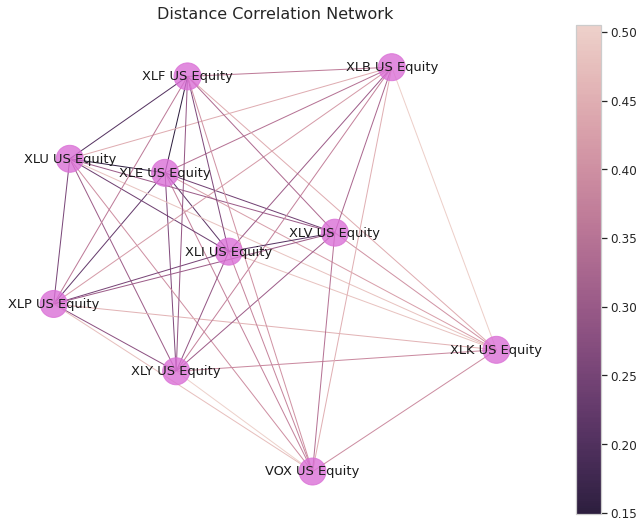

In [79]:
# plots the distance correlation network 
plt_corr_nx(month1_net, title='Distance Correlation Network')

## Pagerank

In [89]:
google = nx.google_matrix(month1_net, alpha=0.85)

matrix([[0.015     , 0.06923222, 0.16496551, 0.13795279, 0.09518688,
         0.10860789, 0.09246984, 0.10079258, 0.06752875, 0.14826354],
        [0.06186736, 0.015     , 0.16161755, 0.15092585, 0.09250526,
         0.10816304, 0.0883099 , 0.10759747, 0.07735071, 0.13666287],
        [0.10588783, 0.11782227, 0.015     , 0.12188868, 0.11246406,
         0.09822301, 0.11788414, 0.10120529, 0.11053466, 0.09909006],
        [0.09868464, 0.12205238, 0.13503967, 0.015     , 0.11564017,
         0.10567918, 0.0887068 , 0.09356995, 0.10237838, 0.12324882],
        [0.07866793, 0.0862091 , 0.14268727, 0.1324036 , 0.015     ,
         0.094414  , 0.08570984, 0.10058467, 0.11618335, 0.14814024],
        [0.08978472, 0.10112534, 0.12470578, 0.12143897, 0.09490612,
         0.015     , 0.09691835, 0.10162874, 0.09735318, 0.15713879],
        [0.0856942 , 0.09241064, 0.16991207, 0.11382148, 0.09626688,
         0.10856899, 0.015     , 0.08166556, 0.09935474, 0.13730543],
        [0.08938   , 0.1078

In [97]:
nx.pagerank_numpy(month1_net, alpha=0.85)

{'XLE US Equity': 0.08125243297105506,
 'XLU US Equity': 0.09178283454229047,
 'XLK US Equity': 0.12567810728424247,
 'XLB US Equity': 0.11319305273751552,
 'XLP US Equity': 0.09879327826066342,
 'XLY US Equity': 0.09837315224170048,
 'XLI US Equity': 0.08775453169731896,
 'XLV US Equity': 0.09177015298469915,
 'XLF US Equity': 0.09268841777460608,
 'VOX US Equity': 0.11871403950590845}

In [98]:
pg_weight = nx.pagerank(month1_net, alpha=0.85)
sum(pg_weight.values())

0.9999999999999999

## Hits

In [100]:
h, a = nx.hits(month1_net, max_iter = 100, tol = 1e-08)
print(h)
print(a)

{'XLE US Equity': 0.08129693983682586, 'XLU US Equity': 0.09334287411426143, 'XLK US Equity': 0.1234485168599048, 'XLB US Equity': 0.11310369220110707, 'XLP US Equity': 0.09998542811464896, 'XLY US Equity': 0.09865379989061189, 'XLI US Equity': 0.08811574048256716, 'XLV US Equity': 0.09122613855361848, 'XLF US Equity': 0.09356351356494443, 'VOX US Equity': 0.11726335638150993}
{'XLE US Equity': 0.08129693983682587, 'XLU US Equity': 0.09334287411426144, 'XLK US Equity': 0.1234485168599048, 'XLB US Equity': 0.11310369220110705, 'XLP US Equity': 0.09998542811464896, 'XLY US Equity': 0.09865379989061189, 'XLI US Equity': 0.08811574048256718, 'XLV US Equity': 0.09122613855361847, 'XLF US Equity': 0.09356351356494443, 'VOX US Equity': 0.11726335638150995}


In [86]:
def risk_allocation(network):
    risk_alloc = nx.communicability_betweenness_centrality(network)
    risk_alloc = pd.Series(risk_alloc)
    risk_alloc = risk_alloc / risk_alloc.sum()
    risk_alloc.reset_index()
    
    risk_alloc = (
        pd.DataFrame({"ETFs": risk_alloc.index, "Risk Allocation": risk_alloc.values})
        .sort_values(by="Risk Allocation", ascending=True)
        .reset_index()
        .drop("index", axis=1)
    )
    
    return risk_alloc

In [87]:
risk_allocation(month1_net)

,ETFs,Risk Allocation
0,XLE US Equity,0.1
1,XLU US Equity,0.1
2,XLK US Equity,0.1
3,XLB US Equity,0.1
4,XLP US Equity,0.1
5,XLY US Equity,0.1
6,XLI US Equity,0.1
7,XLV US Equity,0.1
8,XLF US Equity,0.1
9,VOX US Equity,0.1


In [27]:
df_train = sector_returns.loc['2012-12-31':'2019-01-01']
df_train.tail()

,XLE US Equity,XLU US Equity,XLK US Equity,XLB US Equity,XLP US Equity,XLY US Equity,XLI US Equity,XLV US Equity,XLF US Equity,VOX US Equity,XLRE US Equity
2018-12-24,-0.040456,-0.041814,-0.026689,-0.025926,-0.028896,-0.018985,-0.030683,-0.023948,-0.021062,-0.019729,-0.036834
2018-12-26,0.062221,0.013576,0.060396,0.044782,0.027909,0.059252,0.046569,0.043618,0.045271,0.054198,0.031869
2018-12-27,0.005246,0.008419,0.007201,0.018399,0.009583,0.005337,0.012510,0.011043,0.012007,0.005864,0.002276
2018-12-28,-0.007654,0.002467,-0.002275,-0.005360,0.000000,0.000102,-0.002659,0.001174,-0.000424,0.000407,0.003568
2018-12-31,0.005259,0.001704,0.009446,0.008383,0.004153,0.010719,0.010036,0.014780,0.009750,0.003795,0.001939


In [28]:
df_test = sector_returns.loc['2019-01-01':]
df_test.tail()

,XLE US Equity,XLU US Equity,XLK US Equity,XLB US Equity,XLP US Equity,XLY US Equity,XLI US Equity,XLV US Equity,XLF US Equity,VOX US Equity,XLRE US Equity
2022-05-10,0.009072,-0.012139,0.015245,-0.006230,-0.006911,-0.002972,-0.006544,0.003560,-0.008847,0.002824,-0.022227
2022-05-11,0.013420,0.007203,-0.031562,0.000492,-0.004333,-0.035837,-0.009071,-0.006621,-0.009223,-0.018001,-0.001436
2022-05-12,0.004243,-0.010097,-0.010312,-0.001843,-0.000264,0.006870,0.001853,0.009680,-0.007508,0.012186,0.007429
2022-05-13,0.034183,0.011900,0.033234,0.015387,0.015038,0.039372,0.012727,0.010609,0.014523,0.027115,0.024976
2022-05-16,0.026368,0.003080,-0.008833,-0.001818,0.004548,-0.021599,-0.001396,0.007387,-0.008351,-0.006206,-0.008123


In [76]:
#creates a list of etfs
etfs = sector_returns.columns.tolist()

___

In [30]:
#imports the dcor module to calculate distance correlation
import dcor

#function to compute the distance correlation (dcor) matrix from a DataFrame and output a DataFrame 
#of dcor values.
def df_distance_correlation(df_train):
    
    #initializes an empty DataFrame
    df_train_dcor = pd.DataFrame(index=etfs, columns=etfs)
    
    #initialzes a counter at zero
    k=0
    
    #iterates over the time series of each stock
    for i in etfs:
        
        #stores the ith time series as a vector
        v_i = df_train.loc[:, i].values
        
        #iterates over the time series of each stock subect to the counter k
        for j in etfs[k:]:
            
            #stores the jth time series as a vector
            v_j = df_train.loc[:, j].values
            
            #computes the dcor coefficient between the ith and jth vectors
            dcor_val = dcor.distance_correlation(v_i, v_j)
            
            #appends the dcor value at every ij entry of the empty DataFrame
            df_train_dcor.at[i,j] = dcor_val
            
            #appends the dcor value at every ji entry of the empty DataFrame
            df_train_dcor.at[j,i] = dcor_val
        
        #increments counter by 1
        k+=1
    
    #returns a DataFrame of dcor values for every pair of stocks
    return df_train_dcor

In [31]:
#imports the NetworkX module
import networkx as nx

# takes in a pre-processed dataframe and returns a time-series correlation
# network with pairwise distance correlation values as the edges
def build_corr_nx(df_train):
    
    # converts the distance correlation dataframe to a numpy matrix with dtype float
    cor_matrix = df_train.values.astype('float')
    
    # Since dcor ranges between 0 and 1, (0 corresponding to independence and 1
    # corresponding to dependence), 1 - cor_matrix results in values closer to 0
    # indicating a higher degree of dependence where values close to 1 indicate a lower degree of 
    # dependence. This will result in a network with nodes in close proximity reflecting the similarity
    # of their respective time-series and vice versa.
    sim_matrix = 1 - cor_matrix
    
    # transforms the similarity matrix into a graph
    G = nx.from_numpy_matrix(sim_matrix)
    
    # extracts the indices (i.e., the stock names from the dataframe)
    stock_names = df_train.index.values
    
    # relabels the nodes of the network with the stock names
    G = nx.relabel_nodes(G, lambda x: stock_names[x])
    
    # assigns the edges of the network weights (i.e., the dcor values)
    G.edges(data=True)
    
    # copies G
    ## we need this to delete edges or othwerwise modify G
    H = G.copy()
    
    # iterates over the edges of H (the u-v pairs) and the weights (wt)
    for (u, v, wt) in G.edges.data('weight'):
        # selects edges with dcor values less than or equal to 0.33
        if wt >= 1 - 0.325:
            # removes the edges 
            H.remove_edge(u, v)
            
        # selects self-edges
        if u == v:
            # removes the self-edges
            H.remove_edge(u, v)
    
    # returns the final stock correlation network            
    return H

In [32]:
df_dist_corr = df_distance_correlation(df_train)
network = build_corr_nx(df_dist_corr)

In [47]:
df_dist_corr

,XLE US Equity,XLU US Equity,XLK US Equity,XLB US Equity,XLP US Equity,XLY US Equity,XLI US Equity,XLV US Equity,XLF US Equity,VOX US Equity,XLRE US Equity
XLE US Equity,1.0,0.230743,0.487936,0.663781,0.381285,0.517062,0.604917,0.440762,0.550404,0.451951,0.176619
XLU US Equity,0.230743,1.0,0.274087,0.270027,0.525003,0.275492,0.29805,0.298502,0.216869,0.33014,0.369529
XLK US Equity,0.487936,0.274087,1.0,0.650962,0.52926,0.75463,0.713263,0.64304,0.654943,0.606194,0.278243
XLB US Equity,0.663781,0.270027,0.650962,1.0,0.509145,0.677401,0.786043,0.585989,0.680233,0.549681,0.241276
XLP US Equity,0.381285,0.525003,0.52926,0.509145,1.0,0.583154,0.565795,0.572851,0.500948,0.497121,0.380163
XLY US Equity,0.517062,0.275492,0.75463,0.677401,0.583154,1.0,0.752436,0.663612,0.699536,0.609552,0.27035
XLI US Equity,0.604917,0.29805,0.713263,0.786043,0.565795,0.752436,1.0,0.649192,0.759691,0.577409,0.239783
XLV US Equity,0.440762,0.298502,0.64304,0.585989,0.572851,0.663612,0.649192,1.0,0.617651,0.505367,0.242036
XLF US Equity,0.550404,0.216869,0.654943,0.680233,0.500948,0.699536,0.759691,0.617651,1.0,0.538631,0.203622
VOX US Equity,0.451951,0.33014,0.606194,0.549681,0.497121,0.609552,0.577409,0.505367,0.538631,1.0,0.287688


In [33]:
# function to display the network from the distance correlation matrix
def plt_corr_nx(H, title):

    # creates a set of tuples: the edges of G and their corresponding weights
    edges, weights = zip(*nx.get_edge_attributes(H, "weight").items())

    # This draws the network with the Kamada-Kawai path-length cost-function.
    # Nodes are positioned by treating the network as a physical ball-and-spring system. The locations
    # of the nodes are such that the total energy of the system is minimized.
    pos = nx.kamada_kawai_layout(H)

    with sns.axes_style('whitegrid'):
        # figure size and style
        plt.figure(figsize=(12, 9))
        plt.title(title, size=16)

        # computes the degree (number of connections) of each node
        deg = H.degree

        # list of node names
        nodelist = []
        # list of node sizes
        node_sizes = []

        # iterates over deg and appends the node names and degrees
        for n, d in deg:
            nodelist.append(n)
            node_sizes.append(d)

        # draw nodes
        nx.draw_networkx_nodes(
            H,
            pos,
            node_color="#DA70D6",
            nodelist=nodelist,
            node_size=np.power(node_sizes, 3),
            alpha=0.8
        )

        # node label styles
        nx.draw_networkx_labels(H, pos, font_size=13)

        # color map
        cmap = sns.cubehelix_palette(3, as_cmap=True, reverse=True)

        # draw edges
        nx.draw_networkx_edges(
            H,
            pos,
            edgelist=edges,
            style="solid",
            edge_color=weights,
            edge_cmap=cmap,
            edge_vmin=min(weights),
            edge_vmax=max(weights),
        )

        # builds a colorbar
        sm = plt.cm.ScalarMappable(
            cmap=cmap, 
            norm=plt.Normalize(vmin=min(weights), 
            vmax=max(weights))
        )
        sm._A = []
        plt.colorbar(sm)

        # displays network without axes
        plt.axis("off")

#silence warnings   
import warnings
warnings.filterwarnings("ignore")

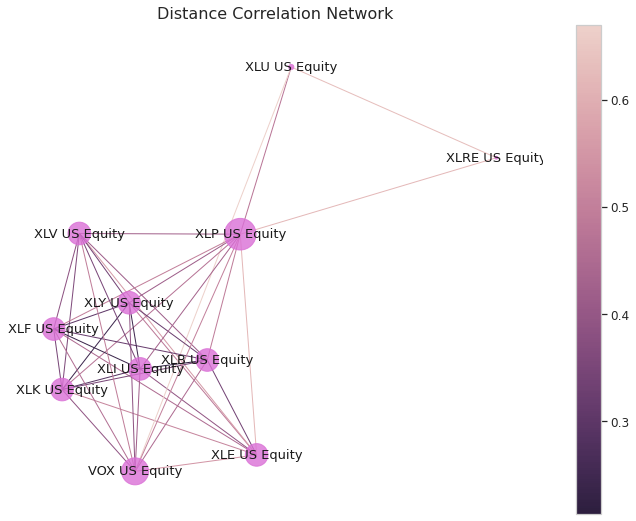

In [34]:
# plots the distance correlation network 
plt_corr_nx(network, title='Distance Correlation Network')

In [35]:
# function to visualize the degree distribution
def hist_plot(network, title, bins, xticks):
    
    # extracts the degrees of each vertex and stores them as a list
    deg_list = list(dict(network.degree).values())
    
    # sets local style
    with plt.style.context('fivethirtyeight'):
        # initializes a figure
        plt.figure(figsize=(9,6))

        # plots a pretty degree histogram with a kernel density estimator
        sns.distplot(
            deg_list,  
            kde=True,
            bins = bins,
            color='darksalmon',
            hist_kws={'alpha': 0.7}

        );

        # turns the grid off
        plt.grid(False)

        # controls the number and spacing of xticks and yticks
        plt.xticks(xticks, size=11)
        plt.yticks(size=11)

        # removes the figure spines
        sns.despine(left=True, right=True, bottom=True, top=True)

        # labels the y and x axis
        plt.ylabel("Probability", size=15)
        plt.xlabel("Number of Connections", size=15)

        # sets the title
        plt.title(title, size=20);

        # draws a vertical line where the mean is
        plt.axvline(sum(deg_list)/len(deg_list), 
                    color='darkorchid', 
                    linewidth=3, 
                    linestyle='--', 
                    label='Mean = {:2.0f}'.format(sum(deg_list)/len(deg_list))
        )

        # turns the legend on
        plt.legend(loc=0, fontsize=12)

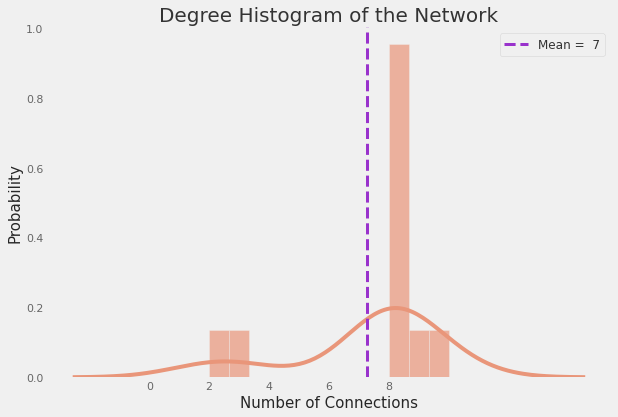

In [36]:
# plots the degree histogram of the network
hist_plot(
    network, 
    'Degree Histogram of the Network',  
    bins = 12,
    xticks=range(0, 10, 2)
)

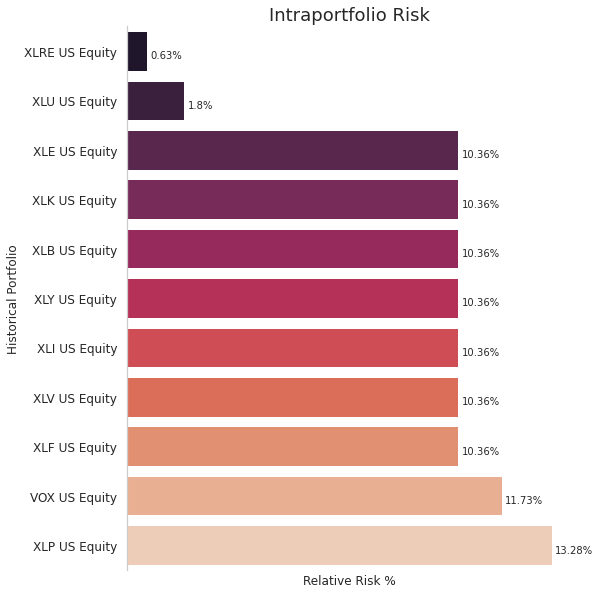

In [37]:
# calculates the communicability betweeness centrality and returns a dictionary
risk_alloc = nx.communicability_betweenness_centrality(network)

# converts the dictionary of degree centralities to a pandas series
risk_alloc = pd.Series(risk_alloc)

# normalizes the degree centrality 
risk_alloc = risk_alloc / risk_alloc.sum()

# resets the index
risk_alloc.reset_index()

# converts series to a sorted DataFrame
risk_alloc = (
    pd.DataFrame({"ETFs": risk_alloc.index, "Risk Allocation": risk_alloc.values})
        .sort_values(by="Risk Allocation", ascending=True)
        .reset_index()
        .drop("index", axis=1)
)

with sns.axes_style('whitegrid'):
    # initializes figure
    plt.figure(figsize=(8,10))

    # plots a pretty seaborn barplot
    sns.barplot(x='Risk Allocation', y='ETFs', data=risk_alloc, palette="rocket")

    # removes spines
    sns.despine(right=True, top=True, bottom=True)

    # turns xticks off
    plt.xticks([])

    # labels the x axis
    plt.xlabel("Relative Risk %", size=12)

    # labels the y axis
    plt.ylabel("Historical Portfolio", size=12)

    # figure title
    plt.title("Intraportfolio Risk", size=18)

    # iterates over the stocks (label) and their numerical index (i)
    for i, label in enumerate(list(risk_alloc.index)):

        # gets the height of each bar in the barplot
        height = risk_alloc.loc[label, 'Risk Allocation']

        # gets the relative risk as a percentage (the labels)
        label = (risk_alloc.loc[label, 'Risk Allocation']*100 
                    ).round(2).astype(str) + '%'

        # annotates the barplot with the relative risk percentages
        plt.annotate(str(label), (height + 0.001, i + 0.15))

In [38]:
# calculates communicability betweeness centrality
weights = nx.communicability_betweenness_centrality(network)

# a function to convert centrality scores to portfolio weights
def centrality_to_portfolio_weights(weights):
    
    """Returns a dictionary of portfolio weights.
    
    Parameters
    ----------
    weights: dictionary
        NetworkX centrality scores
        
    Returns
    -------
    portfolio weights: dictionary
        normalized inverse of chosen centrality measure
        
    """

    # iterates over the key, value pairs in the weights dict
    for key, value in weights.items():

        # takes the inverse of the communicability betweeness centrality of each asset
        weights[key] = 1/value

    # normalization parameter for all weights to add to 1
    norm = 1.0 / sum(weights.values())

    # iterates over the keys (stocks) in the weights dict
    for key in weights:

        # updates each key value to the normalized value and rounds to 3 decimal places
        weights[key] = round(weights[key] * norm, 3)
        
    return weights
    


print(centrality_to_portfolio_weights(weights))

{'XLE US Equity': 0.032, 'XLU US Equity': 0.186, 'XLK US Equity': 0.032, 'XLB US Equity': 0.032, 'XLP US Equity': 0.025, 'XLY US Equity': 0.032, 'XLI US Equity': 0.032, 'XLV US Equity': 0.032, 'XLF US Equity': 0.032, 'VOX US Equity': 0.029, 'XLRE US Equity': 0.532}


In [39]:
etf_weights = centrality_to_portfolio_weights(weights)

In [40]:
def sector_return(dictionary):
    return_sum = 0
    for key, value in etf_weights.items():
        return_sum += sector_returns[key]*value
    return return_sum

In [41]:
df_test['static_re'] = sector_return(etf_weights)

In [42]:
df_test

,XLE US Equity,XLU US Equity,XLK US Equity,XLB US Equity,XLP US Equity,XLY US Equity,XLI US Equity,XLV US Equity,XLF US Equity,VOX US Equity,XLRE US Equity,static_re
2019-01-02,0.019704,-0.017196,0.000645,0.005146,-0.005908,0.007575,0.005123,-0.015143,0.008396,0.013096,-0.022903,0.003544
2019-01-03,-0.009918,-0.000192,-0.050468,-0.028358,-0.005745,-0.021652,-0.030429,-0.020305,-0.022481,-0.013459,0.004622,-0.021383
2019-01-04,0.034024,0.014808,0.044320,0.039319,0.021319,0.033094,0.037916,0.029831,0.033220,0.041470,0.010187,0.034111
2019-01-07,0.014866,-0.006822,0.008943,0.003510,-0.001366,0.022612,0.008135,0.003839,0.001237,0.009339,0.008458,0.007387
2019-01-08,0.007735,0.012402,0.008380,0.010494,0.009181,0.011056,0.013703,0.007765,0.000823,0.016962,0.017419,0.009735
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-10,0.009072,-0.012139,0.015245,-0.006230,-0.006911,-0.002972,-0.006544,0.003560,-0.008847,0.002824,-0.022227,-0.000605
2022-05-11,0.013420,0.007203,-0.031562,0.000492,-0.004333,-0.035837,-0.009071,-0.006621,-0.009223,-0.018001,-0.001436,-0.010679
2022-05-12,0.004243,-0.010097,-0.010312,-0.001843,-0.000264,0.006870,0.001853,0.009680,-0.007508,0.012186,0.007429,0.001539
2022-05-13,0.034183,0.011900,0.033234,0.015387,0.015038,0.039372,0.012727,0.010609,0.014523,0.027115,0.024976,0.022126


In [43]:
qs.reports.metrics(df_test['static_re'], benchmark='SPY', mode='full')

                           Strategy    Benchmark (SPY)
-------------------------  ----------  -----------------
Start Period               2019-01-02  2019-01-02
End Period                 2022-05-16  2022-05-16
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          69.9%       68.73%
CAGR﹪                     17.03%      16.79%

Sharpe                     0.82        0.81
Prob. Sharpe Ratio         93.57%      93.47%
Smart Sharpe               0.65        0.65
Sortino                    1.12        1.12
Smart Sortino              0.9         0.89
Sortino/√2                 0.79        0.79
Smart Sortino/√2           0.63        0.63
Omega                      1.18        1.18

Max Drawdown               -36.07%     -33.72%
Longest DD Days            190         172
Volatility (ann.)          22.33%      22.11%
R^2                        0.96        0.96
Information Ratio          0.0         0.0
Calmar                     

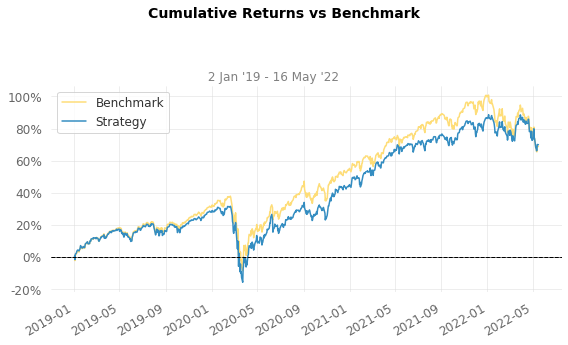

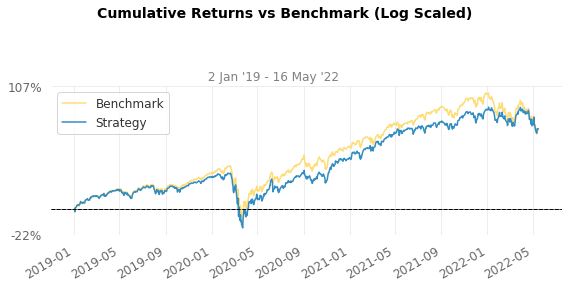

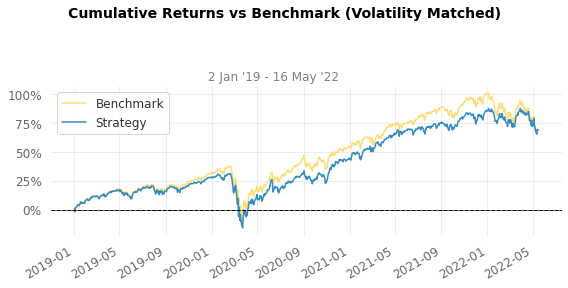

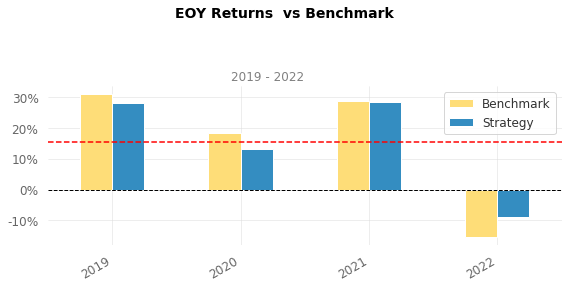

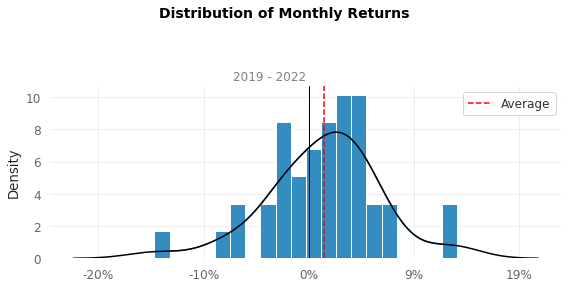

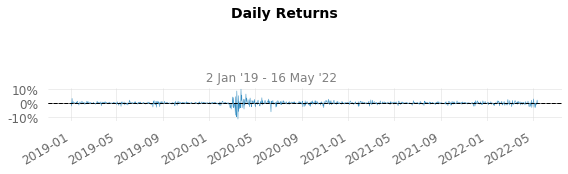

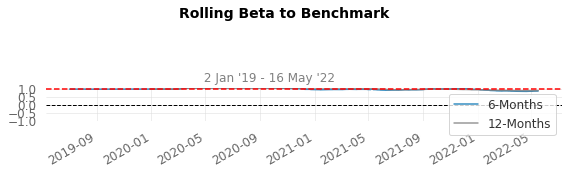

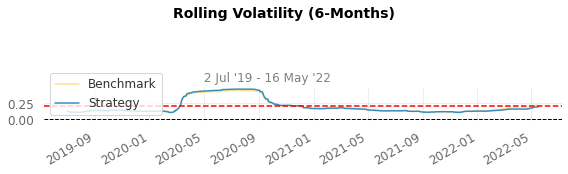

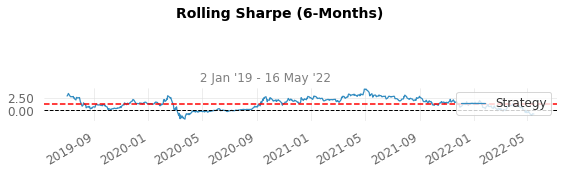

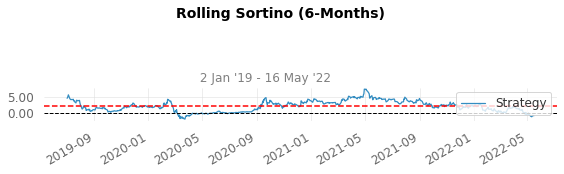

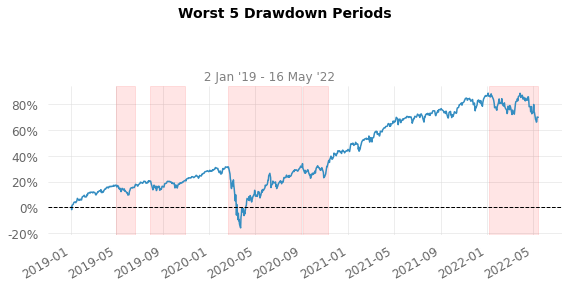

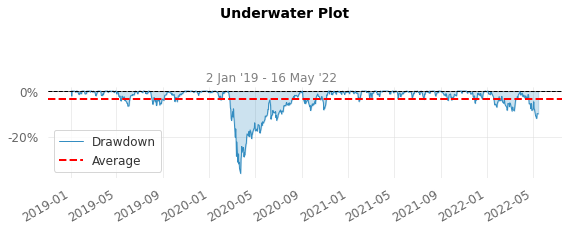

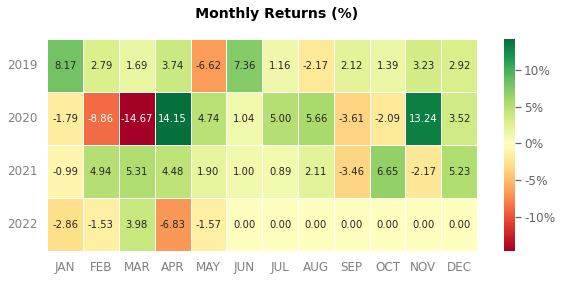

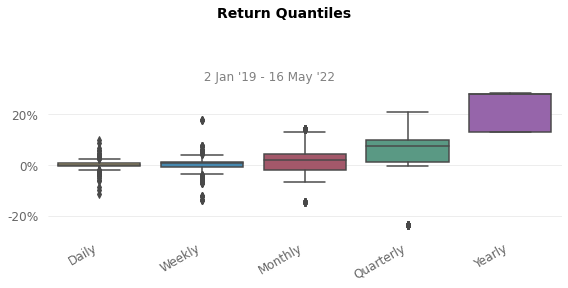

In [45]:
qs.reports.plots(df_test['static_re'], benchmark='SPY', mode='full')

In [46]:
qs.reports.html(df_test['static_re'], benchmark='SPY', mode='full')